# Task Implementation and Result
---


*   NAME      : NETHSARA R.A.A
*   REG NO    : EG/2020/4095
*   SEMESTER  : 07
*   DATE      : 21/06/2025

Github Link :
[https://github.com/ashen829/Computer_Vision_TakeHome_1.git](https://github.com/ashen829/Computer_Vision_TakeHome_1.git)

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 	Task 1: Intensity Level Reduction

Code Implementation

In [65]:
def reduce_intensity_levels(image, levels):
  if not (levels & (levels - 1) == 0 and levels <= 256):
    raise ValueError("Levels must be a power of 2 and ≤ 256")

  # Compute the quantization step
  step = 256 // levels
  reduced_img = (image // step) * step
  return reduced_img

In [66]:
img_path = "/content/image/image.jpg"
original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if original_img is None:
  raise FileNotFoundError(f"Image file not found at {img_path}")

levels = 8
reduced_img = reduce_intensity_levels(original_img, levels)


In [67]:

reduced_img = cv2.imread("/content/image/image.jpg")

if reduced_img is None:
    raise ValueError("Image is empty. Check the image path or processing.")

output_path = "/content/results/intensity_reduced_img.jpg"
success = cv2.imwrite(output_path, reduced_img)

if success:
    print("Image saved successfully at:", output_path)
else:
    print("Failed to save image.")

Image saved successfully at: /content/results/intensity_reduced_img.jpg


Results:

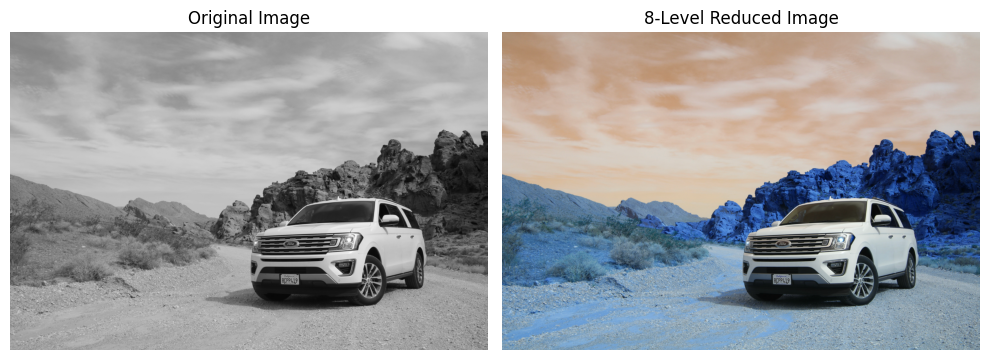

In [68]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reduced_img, cmap='gray')
plt.title(f'{levels}-Level Reduced Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Task 2: Spatial Average

Code Implementation:

In [69]:
def average_filter(img, mask):
  return cv2.blur(img, (mask, mask))


In [70]:
convoluted_img_3 = average_filter(original_img, 3)
convoluted_img_10 = average_filter(original_img, 10)
convoluted_img_20 = average_filter(original_img, 20)
images = [original_img, convoluted_img_3, convoluted_img_10, convoluted_img_20]
topics = ['Original Image', '3x3 Averaged Image', '10x10 Averaged Image', '20x20 Averaged Image']


In [71]:
for i in range(1, 4):
  output_path = os.path.join("content", "results", f"{topics[i]}.jpg")
  cv2.imwrite(output_path, images[i])

Results:

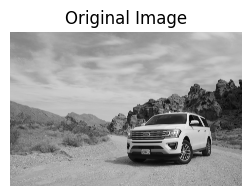

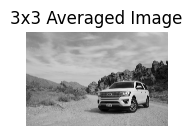

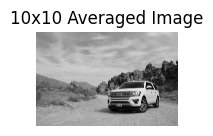

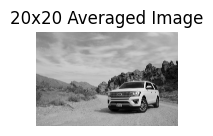

In [72]:
plt.figure(figsize=(10, 5))
for i in range(0, 4):
  plt.subplot(1, 4, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(topics[i])
  plt.axis('off')
  plt.tight_layout()
  plt.show()

# Task 3: Image Rotation

Rotate by 45 degree

In [73]:
output_dir = "/content/results"

(rows, cols) = original_img.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
angled_img = cv2.warpAffine(original_img, M, (cols, rows))

output_path = os.path.join(output_dir, "45_rotated_img.jpg")
cv2.imwrite(output_path, angled_img)


True

Rotate by 90 degree

In [74]:
rotated_img = cv2.rotate(original_img, cv2.ROTATE_90_CLOCKWISE)
output_path = os.path.join(output_dir, "90_rotated_img.jpg")
cv2.imwrite(output_path, rotated_img)


True

Results:

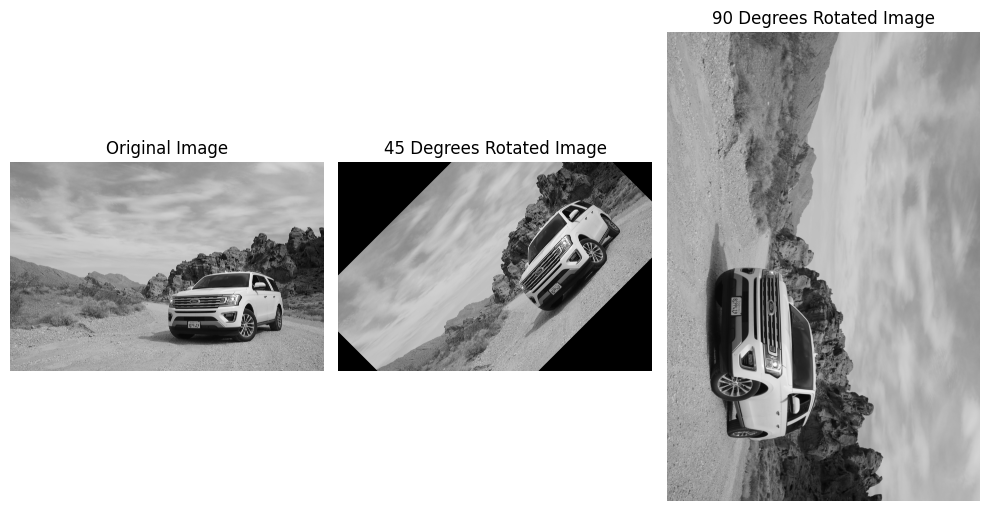

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(angled_img, cmap='gray')
plt.title(f'45 Degrees Rotated Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(rotated_img, cmap='gray')
plt.title(f'90 Degrees Rotated Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Task 4: Spatial Resolution Reduction

Code Implementation:

In [76]:
def block_average(img, k):
  h, w = img.shape[:2]
  out = img.copy()

  for i in range(0, h-k+1, k):
    for j in range(0, w-k+1, k):
      block = img[i:i+k, j:j+k]
      mean = block.mean(axis=(0, 1), dtype=np.uint8)
      out[i:i+k, j:j+k] = mean
  return out

In [77]:
img_3 = block_average(original_img, 3)
img_5 = block_average(original_img, 5)
img_7 = block_average(original_img, 7)

In [78]:
titles = ['Original', '3x3 Block Averaged', '5x5 Block Averaged', '7x7 Block Averaged']
blocked_images = [original_img, img_3, img_5, img_7]

for i in range(1, 4):
  output_path = os.path.join("..", "results", f"{titles[i]}.jpg")
  cv2.imwrite(output_path, images[i])


In [79]:
titles = ['Original', '3x3 Block Averaged', '5x5 Block Averaged', '7x7 Block Averaged']
blocked_images = [original_img, img_3, img_5, img_7]

for i in range(1, 4):
  output_path = os.path.join("..", "results", f"{titles[i]}.jpg")
  cv2.imwrite(output_path, images[i])


Results:

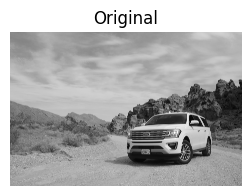

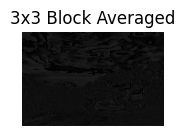

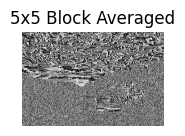

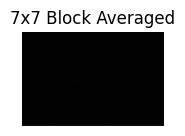

In [80]:
plt.figure(figsize=(10, 5))

for i in range(0, 4):
  plt.subplot(1, 4, i+1)
  plt.imshow(blocked_images[i], cmap='gray')
  plt.title(titles[i])
  plt.axis('off')
  plt.tight_layout()
  plt.show()

---